**Table of Contents:**
* [1. Background and Problem Description](#one)
* [2. Import Libraries](#two)
* [3. Define Classes](#three)
* [4. Define Parameters](#four)
* [5. Create Models Object](#five)
* [6. Position Players](#six)
* [7. Pitchers](#seven)
* [8. Conclusions](#eight)

----
<a class="anchor" id="one"></a>
## 1. Background and Problem Description

The Baseball Hall of Fame (HOF) recognizes and honors those who have achieved a level of excellence in the sport as a player, manager, executive or pioneer. The first election for induction into the HOF was held in 1936. The National Baseball Hall of Fame and Museum in Cooperstown, NY opened in 1939. The specific requirements for eligibility and voting process have changed several times in the years since, but currently are:
<br>

### Eligibility
- Players must have played in at least 10 seasons
- Some of the 10 seasons must have been in a period between 5 and 15 years prior to the election
- Players must have ceased playing at least five years prior to the election
- In the event of death, a player is eligible for election prior to 5 years after his final game, provided other requirements are met.
- Players on Baseball's ineligible list are not to be considered for election

<br>

### Election Process
- The Baseball Writers Association of America (BBWAA) Screening Committee prepares a ballot that includes a) votes on at least 5% of ballots in the previous election or b) eligible for the first time and nominated by at least two of the six members of the committee
- BBWAA members vote for candidates on the ballot. No elector may vote for more than 10 players in an election. Players must be included on 75% of ballots cast to be elected into the HOF
- A player may remain on the ballot for a maximum of ten years. If a player is not elected in 10 years, their name is removed from the BBWAA ballot. 
- Players that are no longer eligible for the BBWAA ballot may still be considered by the Era Committees, each focused on a specific period of baseball history. Committees meet on a rotating basis every five or ten years, so that one or two committees is involved in the election in any given year.



Using data from the Lahman database http://www.seanlahman.com/baseball-archive/statistics/ and baseballreference.com https://www.baseball-reference.com/data/ through the 2019 season, we will attempt to predict which players will be inducted to the HOF.<br><br>
For our purposes, only Major League Baseball players are included. Negro League players or off-field personnel are not included in the models.<br><br>
Definitions of statistics: https://www.baseball-reference.com/bullpen/Baseball_statistics

<br>

### Performance Enhancing Drugs (PEDs)
The use of performance enhancing drugs (PEDs), primarily anabolic steroids and human growth hormone, is believed to have begun in MLB in the 1980s, with usage increasing dramatically in the 1990s and early 2000s. MLB, under pressure from US Congress, implemented a testing program with penalties in 2005, which appears to have significantly curtailed the use of PEDs by MLB players. The period of the 1990s and early 2000s is commonly referred to as "The steroid era" and the effect of steroids on the statistics of game is undeniable, if difficult to quantify. During the steroid era, average runs scored per game reached their highest level in over 60 years. 

https://tabsoft.co/3trrwZ7

Home Run totals, in particular, increased dramatically during this time. From 1901-1997, two players had hit 60 home runs in a single season - Babe Ruth (60) in 1927 and Roger Maris (61) in 1961. In 1998 alone two more players, Mark McGwire and Sammy Sosa, exceeded Maris' total, clubbing 70 and 66 homers respectively. Both players surpassed the 60 home runs threshold again in 1999, and Sosa did it a third time in 2001. 

As is more directly relevant to modeling here, which uses career totals, hitting 500 career home runs was long-considered an "automatic" ticket to induction into the HOF. Through the 1998 season, 15 players had hit 500 career home runs in nearly 100 years of "modern" MLB history. All had been inducted into the Hall of Fame. Since 1999, a period of roughly 20 seasons, 12 more players have joined the 500 home run club. Of those 12, 9 have been retired long enough to be included on the BBWAA ballot for the HOF. Of those 9, only 3 (Ken Griffey Jr., Jim Thome and Frank Thomas) have been elected for induction. The remaining six players include Barry Bonds, who holds the career and single-season records for home runs, as well as McGwire, Sosa, Rafael Palmeiro, Gary Sheffield and Manny Ramirez. Five of those six, Sosa being the exception, were either named in the Mitchell report on PED use in MLB, and/or failed at least one PED test after the testing plan was introduced.

PED usage in MLB is a cloudy issue, with many players facing suspicion based on circumstantial or anectdotal evidence. Knowing which players used and when their usage occured is impossible. But what is clear is that the perception of PED usage has worked against several players' chances for HOF induction. Many BBWAA members have publicly discussed their perception of which players used and how they felt it impacted the players' HOF candidacy. What is known for certain is that for all players against which there is "hard" evidence, either as the result of the Mitchell Report or a failed test, <b>none</b> have been inducted into the HOF. Others, such as Sosa, have no hard evidence but suspicion of their usage is sufficent that their candidacy has clearly been adversely affected.

The process here provides the option of excluding known PED users from the datasets used to train the models in an attempt to avoid introducing bias based on the career totals of some non-inducted PED users. After training, a data subset of exclusively PED users is used to predict which PED users would have been inducted without the stigma of PEDs. This does not affect players only suspected of PED use, such as Sosa.


### Other known borderline cases.
#### Frankie Frisch's teammates
From 1967 until his death in 1973, Hall of Fame second baseman Frankie Frisch was part of the veteran's committee to consider players that had exhausted their eligibility on the BBWAA ballot. By several accounts, Frish had an unusual amount of influence on the committee during those years, and five of his former teammates from the 1919-26 New York Giants or 1927-37 St. Louis Cardinals were selected by the committee: 

Dave Bancroft<br>
Chick Hafey<br>
Jesse Haines<br>
George "High Pockets" Kelly<br>
Ross Youngs<br>

In the years shortly after Frisch's death, two more of his former teammates were selected by the veteran's committee, Fred Lindstrom and Jim Bottomley. It is less certain that these two were the direct result of Frisch's prior lobbying on their behalf. These seven players are often mentioned among the least deserving in the Hall of Fame. 

https://sabr.org/bioproj/person/frankie-frisch/
https://www.cooperstownexpert.com/2017/01/frankie-frischs-vets-committee-selections-defined-damaged-hall/

#### "Baseball's Sad Lexicon"
First published in the New York Evening Mail on July 12, 1910, under the title "That Double Play Again" this poem by Franklin Pierce Adams immortalized the infielders of the Chicago Cubs as it decribes the disappointment of a NY Giants fan when a Cubs double play squelches a Giants' rally. 

These are the saddest of possible words:<br>
"Tinker to Evers to Chance."<br>
Trio of bear cubs, and fleeter than birds,<br>
Tinker and Evers and Chance.<br>
Ruthlessly pricking our gonfalon bubble,<br>
Making a Giant hit into a double –<br>
Words that are heavy with nothing but trouble:<br>
"Tinker to Evers to Chance." <br>

Joe Tinker, Johnny Evers and Frank Chance were elected to the HOF together in 1946. Many credit the poem with boosting their chances for enshrinement.

https://en.wikipedia.org/wiki/Baseball%27s_Sad_Lexicon

#### The Black Sox
Following the 1920 season, eight members of the Chicago White Sox were banned from baseball for life for their involvement in throwing the 1919 World Series in favor of the Cincinnatti Reds in what became known as the Black Sox Scandal. This ended their playing careers. Of the "Eight Men Out" only two, "Shoeless" Joe Jackson and pitcher Ed Cicotte, had already played the 10 years rquired to be considered for the HOF. With their careers cut short and the stain of the scandal, many felt it inappropriate for them to be enshrined in the HOF. When Pete Rose was banned for life, also for gambling, in 1989, the BBWAA voted in 1991 to bar anyone on MLB's ineligible list from the ballot for the HOF. Jackson and Cicotte were well past their BBWAA eligibility, but could presumably be considered by the relevant era committee, and Jackson's candidacy received a boost following the release of the movie "Field of Dreams" in 1989. My research into their current status re: eligibility did not reach a clear conclusion, as I found conflicting statements from different MLB executives regarding the status of an inelgible person upon their death. In any event, the shadow of their participation in the scandal undoubtedly affected the perception of their worthiness for the HOF.

Unlike the known PED users, these last three groups of players are included in modeling and prediction. I mention them here specifically to point out that these are exactly the types of players for which an incorrect prediction is most likely due to information that is beyond the scope of the data. 


<a class="anchor" id="two"></a>
## 2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import graphviz
from imblearn.over_sampling import SMOTE 
from pydotplus import graph_from_dot_data
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.utils import shuffle

<a class="anchor" id="three"></a>
## 3. Define Classes
#### Data Class

In [2]:
class Data:
    def __init__(self, data_file, drop_cols, label_cols, target_col, preprocess, excl_ped, one_hot_encode, split_train_test, test_pct, seed):
        '''create train and test dataframe'''
        #create new copies instead of references
        self.drop_cols = list(drop_cols)
        self.label_cols = list(label_cols)
        self.target_col = target_col
        self.test_pct = test_pct
        self.seed = seed
        self.train_features_df, self.test_features_df, self.train_target_df, self.test_target_df, self.labels_df = \
        self._create_df(data_file, drop_cols, label_cols, target_col, id_col, preprocess, one_hot_encode)

    def _load_data(self, file):
        '''loads csv to pd dataframe'''
        return pd.read_csv(file)
    
    def _create_df(self, data_file, drop_cols, label_cols, target_col, id_col, preprocess=False, one_hot_encode=False):
        '''loads data, preprocesses, encodes and seperates data into df for modeling'''
        df = self._load_data(data_file)        
        print("Preprocess: ", preprocess)
        if preprocess:
            df = self._clean_data(df)
            df = self._shuffle_data(df)

        # Exclude known PED users
        print("Exclude PED users: ", excl_ped)
        if excl_ped:
            df = self._excl_ped(df)     
            
        # Break df by columns into multiple dfs to prepare for encoding and modeling
        print("Splitting labels, features and target")
        labels_df, features_df, target_df = self._split_cols(df, label_cols, target_col)
        
        # Perform one-hot encoding prior to splitting data to ensure that all cases are included in encoding
        print("One-hot Encode: ", one_hot_encode)
        if one_hot_encode:
            features_df = self._one_hot_encode_df(features_df)
        
        # Split df into features/target and train/test
        print("Split Train/Test sets: ", split_train_test)
        if split_train_test:
            train_features_df, test_features_df, train_target_df, test_target_df = self._split_data(features_df, target_df, test_pct, seed)
        else:
            train_features_df = []
            train_target_df = []
            test_features_df = features_df
            test_target_df = target_df
            
        return train_features_df, test_features_df, train_target_df, test_target_df, labels_df
        
    def _clean_data(self, df):
        '''remove Pete Rose (ineligible) and columns in drop_cols'''
        df = df[df['playerID'] != 'rosepe01']
        df = df.drop(drop_cols, axis = 1) 
        return df

    def _shuffle_data(self, df):
        return shuffle(df).reset_index(drop=True)  
    
    def _split_cols(self, df, label_cols, target_col):
        ''' breaks df into label, feature and target cols and creates dfs '''
        labels_df = df[label_cols]
        df = df.drop(label_cols, axis=1)
        feature_cols = df.drop([target_col], axis=1).columns
        features_df = df[feature_cols]
        target_df = df[target_col]
        return labels_df, features_df, target_df

    def _excl_ped(self, df):
        '''removes known PED users from the modeling data sets'''
        df_PED = pd.read_csv('data_sql_export\pPED.csv')
        df = pd.merge(df, df_PED, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
        return df
    
    def _one_hot_encode_df(self, df):
        '''performs one-hot encoding on all categorical variables and combines result with continous variables'''
        cat_cols = df.select_dtypes(include='object').columns.tolist()
        num_cols = df.select_dtypes(include=np.number).columns.tolist()

        cat_df = pd.get_dummies(df[cat_cols], drop_first=True)
        num_df = df[num_cols].apply(pd.to_numeric)
        features_df =  pd.concat([num_df, cat_df], axis=1)#,ignore_index=False)
        return features_df
        
    def _split_data(self, features_df, target_df, test_pct, seed):
        ''' breaks df into feature and target cols, then splits into train and test sets '''
        train_features_df, test_features_df, train_target_df, test_target_df = \
        train_test_split(features_df, target_df, test_size=test_pct, random_state=seed, stratify=target_df)
        return train_features_df, test_features_df, train_target_df, test_target_df
    


#### Sample Balance Class

In [3]:
class Balance:
    def __init__(self, train_features_df, train_target_df, seed):
        '''create train and test dataframe'''
        #create new copies instead of references
        self.train_features_df = train_features_df
        self.train_target_df = train_target_df
        self.seed = seed
        self.train_features_df_u, self.train_target_df_u, self.train_features_df_sm, self.train_target_df_sm, \
        self.train_features_df_d, self.train_target_df_d = \
        self._balance_sample(train_features_df, train_target_df, seed)
        #self.train_features_df_u, self.train_target_df_u = self._balance_sample(train_features_df, train_target_df, seed)

    def _balance_sample(self, train_features_df, train_target_df, seed):
        # Original
        print("Original shape:", train_features_df.shape, train_target_df.shape)
        self._print_target_summary(train_target_df)
        
        # Random upsample
        train_features_df_u, train_target_df_u = self._random_upsample(train_features_df, train_target_df, seed)
        print("Upsampled shape:", train_features_df_u.shape, train_target_df_u.shape)
        self._print_target_summary(train_target_df_u)
        
        # smote upsample
        train_features_df_sm, train_target_df_sm = self._smote_upsample(train_features_df, train_target_df, seed)
        print ("SMOTE sample shape:", train_features_df_sm.shape, train_target_df_sm.shape)
        self._print_target_summary(train_target_df_sm)
        
        # Downsample majority class
        train_features_df_d, train_target_df_d = self._downsample(train_features_df, train_target_df, seed)
        print("Downsampled shape:", train_features_df_d.shape, train_target_df_d.shape)
        self._print_target_summary(train_target_df_d)
        
        return train_features_df_u, train_target_df_u, train_features_df_sm, train_target_df_sm, \
        train_features_df_d, train_target_df_d
    
    def _random_upsample(self, train_features_df, train_target_df, seed):
        '''randomly upsample minority class to balance the target feature'''
        train_features_df_u, train_target_df_u = resample(train_features_df[train_target_df == 1], 
                                                          train_target_df[train_target_df == 1], 
                                                          replace=True, 
                                                          n_samples=train_features_df[train_target_df == 0].shape[0], 
                                                          random_state=seed)

        train_features_df_u = np.concatenate((train_features_df[train_target_df == 0], train_features_df_u))
        train_features_df_u = pd.DataFrame(train_features_df_u, columns = train_features_df.columns)
        train_target_df_u = np.concatenate((train_target_df[train_target_df == 0], train_target_df_u))
        return train_features_df_u, train_target_df_u
    
    def _smote_upsample(self, train_features_df, train_target_df, seed):
        '''use nearest neighbors to upsample minority class and balance the target feature'''
        sm = SMOTE(random_state=seed, sampling_strategy = 1.0)
        train_features_df_sm, train_target_df_sm = sm.fit_resample(train_features_df, train_target_df)
        train_features_df_sm = pd.DataFrame(train_features_df_sm, columns = train_features_df.columns)
        return train_features_df_sm, train_target_df_sm

    def _downsample(self, train_features_df, train_target_df, seed):
        '''use nearest neighbors to upsample minority class and balance the target feature'''
        train_features_df_d, train_target_df_d = resample(train_features_df[train_target_df == 0], 
                                                          train_target_df[train_target_df == 0],
                                                          replace=True,
                                                          n_samples=train_features_df[train_target_df == 1].shape[0],
                                                          random_state=seed)
 
        train_features_df_d = np.concatenate((train_features_df[train_target_df == 1], train_features_df_d))
        train_target_df_d = np.concatenate((train_target_df[train_target_df == 1], train_target_df_d))
        train_features_df_d = pd.DataFrame(train_features_df_d, columns = train_features_df.columns)
        return train_features_df_d, train_target_df_d
    
    def _print_target_summary(self, df):
        df_tar = pd.DataFrame(df, columns = ['inducted'])
        inducted_tab = pd.crosstab(index=df_tar["inducted"],  # Make a crosstab
                                      columns="count")      # Name the count column
        inducted_tab['pct'] = pd.crosstab(index=df_tar["inducted"], columns="count", normalize ="columns") * 100 
        print('Target balance', '\n', inducted_tab, '\n')

    
    

#### Scaling Class

In [4]:
class Scale:
    def __init__(self, df):
        '''create train and test dataframe'''
        #create new copies instead of references
        self.df = df
        self.df_scaled = self._scale(df)

    def _scale(self, df):
        scaler = StandardScaler()
        scaler.fit(df)
        df_scaled = pd.DataFrame(scaler.transform(df), columns=df.columns)
        return df_scaled

#### Model Class

In [5]:
class ModelContainer:
    def __init__(self, models=[], default_num_iters=10, verbose_lvl=0):
        '''initializes model list and dicts'''
        self.models = []
        self.results_df = None
        self.best_result = None
        self.best_dataset = None
        self.best_x_train = None
        self.best_y_train = None
        self.best_model = None
        self.predictions = None
        self.mean_score = {}
        self.cv_std = {}
        self.default_num_iters = default_num_iters
        self.verbose_lvl = verbose_lvl
        
    def add_model(self, model):
        self.models.append(model)
        print(model)

    def compare_methods(self, methods_data):
        results_df = pd.DataFrame(columns = ['Dataset', 'Algorithm', 'F1', 'Accuracy', 'Precision', 'Recall'])
        for method in methods_data.keys():
            print('Dataset:', method)
            dataset_results_df = self.cross_validate(method, methods_data[method][0], methods_data[method][1], num_procs, k)
            results_df = results_df.append(dataset_results_df)
            print('\n\n')
        self.results_df = results_df.sort_values(by=['F1'], ascending=False).reset_index(drop=True)
        return self.results_df
    
    def cross_validate(self, method, features, target, num_procs, k=3):
        '''cross validate models using given data'''
        # set table to table to populate with performance results
        results = []
        names = []
        col = ['Dataset', 'Algorithm', 'F1', 'Accuracy', 'Precision', 'Recall']
        dataset_results_df = pd.DataFrame(columns=col)
        i = 0

        feature_df = features
        target_df = target
        for name, model in self.models:
            print(model)
            fold_f1 = cross_val_score(model, feature_df, target_df, cv=k, n_jobs=num_procs, scoring='f1')
            fold_accuracy = cross_val_score(model, feature_df, target_df, cv=k, n_jobs=num_procs, scoring='accuracy')
            fold_precision = cross_val_score(model, feature_df, target_df, cv=k, n_jobs=num_procs, scoring='precision')
            fold_recall = cross_val_score(model, feature_df, target_df, cv=k, n_jobs=num_procs, scoring='recall')
            self.mean_score[model] = np.mean(fold_f1)
            self.cv_std[model] = np.std(fold_f1)
            results.append(self.mean_score)
            names.append(name)
            dataset_results_df.loc[i] = [method,
                                         name,
                                         round(fold_f1.mean(), 4),
                                         round(fold_accuracy.mean(), 4),
                                         round(fold_precision.mean(), 4),
                                         round(fold_recall.mean(), 4)]
            if name == 'Decision Tree Classifier':
                timestr = time.strftime("%Y%m%d-%H%M%S")
                dtc = model.fit(feature_df, target_df)
                dot_data = tree.export_graphviz(dtc, out_file=None,
                                                feature_names=data.test_features_df.columns.tolist(),
                                                class_names=['not inducted', 'inducted'],
                                                filled=True, rounded=True,  
                                                special_characters=True)  
                graph = graph_from_dot_data(dot_data)
                graph.write_png('images/dt_' + method + '-' + timestr + '.png')

            i += 1
        dataset_results_df = dataset_results_df.sort_values(by=['F1'], ascending=False).reset_index(drop=True)
        return dataset_results_df
    
    def select_best_model(self):
        '''select model with best score'''
        self.best_model = max(self.mean_score, key=self.mean_score.get)
        
    def select_best_method(self, methods_data):
        '''select model with best score'''
        self.best_result = self.results_df.loc[self.results_df['F1'].idxmax()]
        self.best_dataset = self.best_result['Dataset']
        models_dict = dict(self.models)
        self.best_model = models_dict[self.best_result['Algorithm']]
        train_sets = methods_data.get(self.best_dataset)
        self.best_x_train = train_sets[0]
        self.best_y_train = train_sets[1]

        
    def best_model_fit(self, features, targets):
        '''fits best model'''
        self.best_model.fit(features, targets)
    
    def best_model_predict(self, features, score):
        '''scores features using best model'''
        self.predictions = self.best_model.predict(features)
        if score:
            print('\nConfusion Matrix:')
            print(confusion_matrix(data.test_target_df, self.predictions), '\n\n', classification_report(data.test_target_df, self.predictions))
            print('\nFeature Importances\n', models.get_feature_importance(models.best_model, self.best_x_train.columns))
            print('Saving results.')

    def merge_test_pred(self, predictions):
        '''saves features and predictions for test set'''
        ind_df = pd.DataFrame(data.test_target_df)
        ind_df['pred'] = self.predictions
        df_test_pred = data.labels_df.join(data.test_features_df)
        df_test_pred = df_test_pred.join(ind_df, how='inner')
        return df_test_pred
        
    def save_results(self, df, playerset):
        '''saves features and predictions for test set'''
        timestr = time.strftime("%Y%m%d-%H%M%S") 
        df.to_excel(r'Output\df_' + playerset + '_pred-' + timestr + '.xlsx')
   
    @staticmethod
    def get_feature_importance(model, cols):
        '''retrieves and sorts feature importances'''
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            feature_importances = pd.DataFrame({'feature':cols, 'importance':importances})
            feature_importances.sort_values(by='importance', ascending=False, inplace=True)
            #set index to 'feature'
            feature_importances.set_index('feature', inplace=True, drop=True)
            return feature_importances[0:25]
            feature_importances[0:25].plot.bar(figsize=(20,10))
            plt.show()     
        else:
            #some models don't have feature_importances_
            return "Feature importances do not exist for given model"


<a class="anchor" id="four"></a>
## 4. Define parameters needed to create and run models

In [6]:
# define number of CV folds
k = 5

# define number of processors to use for parallel runs
num_procs = 4

# set verbose level for models
verbose_lvl = 0

# Define inputs
pos_play_file = 'data_career\pos_play.csv'
pitchers_file = 'data_career\pitchers.csv'
rec_pos_play_file = 'data_career\pos_play_recent.csv'
rec_pitchers_file = 'data_career\pitchers_recent.csv'
pos_play_ped_file = 'data_career\pos_play_ped.csv'
pitchers_ped_file = 'data_career\pitchers_ped.csv'

# Define variables
drop_cols = ['debut', 'final', 'indYear', 'votedBy', 'P']
label_cols = ['playerID', 'Name']
target_col = 'inducted'
id_col = 'playerID'
trans_cols = []
group_cols = []

test_pct = 0.30
seed = 42

# Turn preprocessing on/off
preprocess = True

# Exlude known PED players?
excl_ped = True

# Turn one-hot encoding on/off
one_hot_encode = True

# Turn train/test split on/off
split_train_test = True

# Score model on test set or predict only
score = True


<a class="anchor" id="five"></a>
## 5. Create model container and add models to it

In [7]:
#create model container
models = ModelContainer()

#create models
lr = LogisticRegression(solver='liblinear', max_iter=1000)
rf = RandomForestClassifier(max_depth=15, max_features=8, min_samples_split=80, 
                            n_estimators=200, n_jobs=num_procs, verbose=verbose_lvl)
gbc = GradientBoostingClassifier(n_estimators=80, max_depth=7, loss='deviance', verbose=verbose_lvl)
svc = SVC(kernel='linear')
dtc = tree.DecisionTreeClassifier(max_depth=7)
knn = KNeighborsClassifier(n_neighbors=3)
bayes = GaussianNB()

#add models to model container
models.add_model(('Logistic Regression', lr))
models.add_model(('Random Forest Classifier', rf))
models.add_model(('Gradient Boosting Classifier', gbc))
#models.add_model(('Support Vector Classification', svc))
models.add_model(('Decision Tree Classifier', dtc))
models.add_model(('K Nearest Neighbors', knn))
#models.add_model(('Two Class Bayes', bayes))


('Logistic Regression', LogisticRegression(max_iter=1000, solver='liblinear'))
('Random Forest Classifier', RandomForestClassifier(max_depth=15, max_features=8, min_samples_split=80,
                       n_estimators=200, n_jobs=4))
('Gradient Boosting Classifier', GradientBoostingClassifier(max_depth=7, n_estimators=80))
('Decision Tree Classifier', DecisionTreeClassifier(max_depth=7))
('K Nearest Neighbors', KNeighborsClassifier(n_neighbors=3))


<a class="anchor" id="six"></a>
## 6. Position Players
### Create Data Object

In [8]:
data = Data(pos_play_file, drop_cols, label_cols, target_col, preprocess, excl_ped, one_hot_encode, split_train_test, test_pct, seed)

Preprocess:  True
Exclude PED users:  True
Splitting labels, features and target
One-hot Encode:  True
Split Train/Test sets:  True


### Create Sample Balance Object

In [9]:
balance = Balance(data.train_features_df, data.train_target_df, seed)

Original shape: (1333, 55) (1333,)
Target balance 
 col_0     count        pct
inducted                  
0.0        1220  91.522881
1.0         113   8.477119 

Upsampled shape: (2440, 55) (2440,)
Target balance 
 col_0     count   pct
inducted             
0.0        1220  50.0
1.0        1220  50.0 

SMOTE sample shape: (2440, 55) (2440,)
Target balance 
 col_0     count   pct
inducted             
0.0        1220  50.0
1.0        1220  50.0 

Downsampled shape: (226, 55) (226,)
Target balance 
 col_0     count   pct
inducted             
0.0         113  50.0
1.0         113  50.0 



### Scale the data

In [10]:
train_features_df_scaled = Scale(data.train_features_df).df_scaled
train_features_df_u_scaled = Scale(balance.train_features_df_u).df_scaled
train_features_df_sm_scaled = Scale(balance.train_features_df_sm).df_scaled
train_features_df_d_scaled = Scale(balance.train_features_df_d).df_scaled
test_features_df_scaled = Scale(data.test_features_df).df_scaled

### Compare the method/model combinations, select the best combination and predict the test set

In [11]:
methods_data = {"Original": (data.train_features_df, data.train_target_df),
                "Original_scaled": (train_features_df_scaled, data.train_target_df),
                "Upsampled": (balance.train_features_df_u, balance.train_target_df_u),
                "Upsampled_scaled": (train_features_df_u_scaled, balance.train_target_df_u),
                "SMOTE":(balance.train_features_df_sm, balance.train_target_df_sm),
                "SMOTE_scaled":(train_features_df_sm_scaled, balance.train_target_df_sm),
                "Downsampled": (balance.train_features_df_d, balance.train_target_df_d),
                "Downsampled_scaled": (train_features_df_d_scaled, balance.train_target_df_d)}

In [12]:
models.compare_methods(methods_data)

Dataset: Original
LogisticRegression(max_iter=1000, solver='liblinear')
RandomForestClassifier(max_depth=15, max_features=8, min_samples_split=80,
                       n_estimators=200, n_jobs=4)
GradientBoostingClassifier(max_depth=7, n_estimators=80)
DecisionTreeClassifier(max_depth=7)
KNeighborsClassifier(n_neighbors=3)



Dataset: Original_scaled
LogisticRegression(max_iter=1000, solver='liblinear')
RandomForestClassifier(max_depth=15, max_features=8, min_samples_split=80,
                       n_estimators=200, n_jobs=4)
GradientBoostingClassifier(max_depth=7, n_estimators=80)
DecisionTreeClassifier(max_depth=7)
KNeighborsClassifier(n_neighbors=3)



Dataset: Upsampled
LogisticRegression(max_iter=1000, solver='liblinear')
RandomForestClassifier(max_depth=15, max_features=8, min_samples_split=80,
                       n_estimators=200, n_jobs=4)
GradientBoostingClassifier(max_depth=7, n_estimators=80)
DecisionTreeClassifier(max_depth=7)
KNeighborsClassifier(n_neighbors=3)



Da

,Dataset,Algorithm,F1,Accuracy,Precision,Recall
0,Upsampled,Gradient Boosting Classifier,0.9823,0.9807,0.9645,1.0000
1,Upsampled_scaled,Gradient Boosting Classifier,0.9815,0.9824,0.9660,1.0000
2,Upsampled_scaled,K Nearest Neighbors,0.9800,0.9795,0.9608,1.0000
3,Upsampled_scaled,Decision Tree Classifier,0.9752,0.9762,0.9547,1.0000
4,Upsampled,Decision Tree Classifier,0.9732,0.9746,0.9509,1.0000
5,SMOTE_scaled,K Nearest Neighbors,0.9721,0.9713,0.9458,1.0000
6,SMOTE,Gradient Boosting Classifier,0.9699,0.9693,0.9462,0.9926
7,Upsampled,K Nearest Neighbors,0.9698,0.9689,0.9415,1.0000
8,SMOTE_scaled,Gradient Boosting Classifier,0.9696,0.9689,0.9477,0.9926
9,SMOTE_scaled,Logistic Regression,0.9671,0.9668,0.9561,0.9787


In [13]:
models.select_best_method(methods_data)
print('Best Method/Model:\n', models.best_dataset, '\n', models.best_model)
models.best_model_fit(models.best_x_train, models.best_y_train)
if 'scaled' in models.best_dataset:
    models.best_model_predict(test_features_df_scaled, score)
else:
    models.best_model_predict(data.test_features_df, score)

Best Method/Model:
 Upsampled 
 GradientBoostingClassifier(max_depth=7, n_estimators=80)

Confusion Matrix:
[[502  21]
 [  8  41]] 

               precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       523
         1.0       0.66      0.84      0.74        49

    accuracy                           0.95       572
   macro avg       0.82      0.90      0.86       572
weighted avg       0.96      0.95      0.95       572


Feature Importances
           importance
feature             
WAR         0.721913
AB          0.030763
SB_Pct      0.023077
Slg         0.021939
Avg         0.021629
C           0.020332
BB          0.013098
PA          0.011725
1B          0.010988
SF          0.010865
3B          0.009071
R           0.008641
SO          0.007714
GIDP        0.007058
Triples     0.006389
IBB         0.005821
OBP         0.005613
TB          0.005149
GG_Total    0.004796
OPS         0.004713
GG_1B       0.004620
CS          0.004419
HR          0

### Create the ROC graph

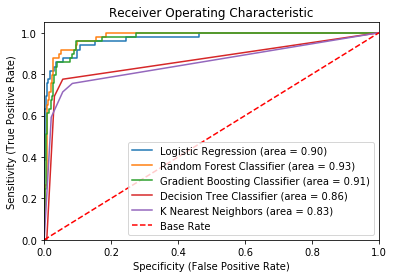

In [14]:
for name, model in models.models:
    model.fit(models.best_x_train, models.best_y_train) # train the model

    # Compute False postive rate, and True positive rate
    if 'scaled' in models.best_dataset:
        fpr, tpr, thresholds = roc_curve(data.test_target_df, model.predict_proba(test_features_df_scaled)[:,1])
    else:
        fpr, tpr, thresholds = roc_curve(data.test_target_df, model.predict_proba(data.test_features_df)[:,1])

    # Calculate Area under the curve to display on the plot
    auc = roc_auc_score(data.test_target_df, model.predict(data.test_features_df))

    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s (area = %0.2f)' % (name, auc))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--', label='Base Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

In [15]:
# Merge the test features, test target and predictions and write to Excel file
df_test_pred = models.merge_test_pred(models.predictions)
models.save_results(df_test_pred, 'pos_play')

### False Positives:

In [16]:
df_false_pos = pd.DataFrame(df_test_pred[(df_test_pred['inducted'] == 0) & (df_test_pred['pred'] == 1)], columns = ['Name', 'inducted', 'pred'])
df_false_pos

,Name,inducted,pred
203,Bobby Abreu,0.0,1.0
230,Art Fletcher,0.0,1.0
305,Hal Trosky,0.0,1.0
409,Roy White,0.0,1.0
732,Ken Williams,0.0,1.0
929,Vern Stephens,0.0,1.0
933,Dwight Evans,0.0,1.0
1109,Jeff Kent,0.0,1.0
1110,Reggie Smith,0.0,1.0
1185,Sherry Magee,0.0,1.0


### False Negatives:

In [17]:
df_false_neg = pd.DataFrame(df_test_pred[(df_test_pred['inducted'] == 1) & (df_test_pred['pred'] == 0)], columns = ['Name', 'inducted', 'pred'])
df_false_neg

,Name,inducted,pred
166,George Kell,1.0,0.0
920,Pie Traynor,1.0,0.0
1106,Tommy McCarthy,1.0,0.0
1229,Ernie Lombardi,1.0,0.0
1500,Ross Youngs,1.0,0.0
1621,Buck Ewing,1.0,0.0
1680,Eddie Murray,1.0,0.0
1767,Hack Wilson,1.0,0.0


## Predict induction for position players who've played too recently to be included in balloting
Some of these players are still active and their candidacy may change based on future play. Assume that their career records to date represent their entire careers and predict which will be inducted.

In [18]:
# Turn train/test split off to disable train/test split
split_train_test = False
rec_data = Data(rec_pos_play_file, drop_cols, label_cols, target_col, preprocess, excl_ped, one_hot_encode, split_train_test, test_pct, seed)

Preprocess:  True
Exclude PED users:  True
Splitting labels, features and target
One-hot Encode:  True
Split Train/Test sets:  False


In [19]:
# Turn off scoring because we the value of the target is unknown for these players
score = False
models.best_model_predict(rec_data.test_features_df, score)

In [20]:
# Merge recent position player features with predictions and save to Excel.
df = pd.read_csv('data_career\pos_play_recent.csv')
df_final = df[['playerID', 'final']].copy()
df_rec_pred = rec_data.labels_df.join(rec_data.test_features_df)
df_rec_pred = pd.merge(df_rec_pred, df_final, how='left', on='playerID')
df_rec_pred['pred'] = models.predictions
models.save_results(df_rec_pred, 'rec_pos_play')

### Recent position players predicted to be inducted into HOF

In [21]:
df_rec_hit_ind = pd.DataFrame(df_rec_pred[(df_rec_pred['pred'] == 1)], columns = ['Name', 'final', 'pred'])
df_rec_hit_ind

,Name,final,pred
0,Ichiro Suzuki,2019,1.0
36,Miguel Cabrera,2020,1.0
65,Adrian Beltre,2018,1.0
67,Chase Utley,2018,1.0
107,Carlos Beltran,2017,1.0
120,Robinson Cano,2020,1.0
122,David Ortiz,2016,1.0
161,Joe Mauer,2018,1.0


## Predict induction for position players who are known PED users
For many of these players, there has been significant public discussion among voting BBWAA members about the impact of their PED usage on their HOF candidacy. As this public perception is outside the scope of the data, let's attempt to predict who would be inducted if PED usage were not an issue.

In [22]:
# Turn train/test split off to disable train/test split
split_train_test = False
excl_ped = False
ped_data = Data(pos_play_ped_file, drop_cols, label_cols, target_col, preprocess, excl_ped, one_hot_encode, split_train_test, test_pct, seed)

Preprocess:  True
Exclude PED users:  False
Splitting labels, features and target
One-hot Encode:  True
Split Train/Test sets:  False


In [23]:
# Turn off scoring because we the value of the target is unknown for these players
score = False
models.best_model_predict(ped_data.test_features_df, score)

In [24]:
# Merge recent position player features with predictions and save to Excel.
df = pd.read_csv('data_career\pos_play_ped.csv')
df_final = df[['playerID', 'final']].copy()
df_ped_pred = ped_data.labels_df.join(ped_data.test_features_df)
df_ped_pred = pd.merge(df_ped_pred, df_final, how='left', on='playerID')
df_ped_pred['pred'] = models.predictions
models.save_results(df_ped_pred, 'pos_play_ped')

### Known PED using position players predicted to be inducted into HOF

In [25]:
df_ped_pred_ind = pd.DataFrame(df_ped_pred[(df_ped_pred['pred'] == 1)], columns = ['Name', 'final', 'pred'])
df_ped_pred_ind

,Name,final,pred
5,Jason Giambi,2014,1.0
7,Miguel Tejada,2013,1.0
10,Mark McGwire,2001,1.0
13,Barry Bonds,2007,1.0
24,Gary Sheffield,2009,1.0
36,Manny Ramirez,2011,1.0


<a class="anchor" id="seven"></a>
## 7. Pitchers
#### Create Data Object

In [26]:
# Turn off one-hot encoding as the pitchers data has no categorical features
one_hot_encode = False
# Turn on Train/Test split
split_train_test = True
excl_ped = True
data = Data(pitchers_file, drop_cols, label_cols, target_col, preprocess, excl_ped, one_hot_encode, split_train_test, test_pct, seed)


Preprocess:  True
Exclude PED users:  True
Splitting labels, features and target
One-hot Encode:  False
Split Train/Test sets:  True


## Create Sample Balance Object

In [27]:
balance = Balance(data.train_features_df, data.train_target_df, seed)

Original shape: (786, 37) (786,)
Target balance 
 col_0     count       pct
inducted                 
0.0         735  93.51145
1.0          51   6.48855 

Upsampled shape: (1470, 37) (1470,)
Target balance 
 col_0     count   pct
inducted             
0.0         735  50.0
1.0         735  50.0 

SMOTE sample shape: (1470, 37) (1470,)
Target balance 
 col_0     count   pct
inducted             
0.0         735  50.0
1.0         735  50.0 

Downsampled shape: (102, 37) (102,)
Target balance 
 col_0     count   pct
inducted             
0.0          51  50.0
1.0          51  50.0 



## Scale the data

In [28]:
train_features_df_scaled = Scale(data.train_features_df).df_scaled
train_features_df_u_scaled = Scale(balance.train_features_df_u).df_scaled
train_features_df_sm_scaled = Scale(balance.train_features_df_sm).df_scaled
train_features_df_d_scaled = Scale(balance.train_features_df_d).df_scaled
test_features_df_scaled = Scale(data.test_features_df).df_scaled

### Compare the method/model combinations, select the best combination and predict the test set

In [29]:
methods_data = {"Original": (data.train_features_df, data.train_target_df),
                "Original_scaled": (train_features_df_scaled, data.train_target_df),
                "Upsampled": (balance.train_features_df_u, balance.train_target_df_u),
                "Upsampled_scaled": (train_features_df_u_scaled, balance.train_target_df_u),
                "SMOTE":(balance.train_features_df_sm, balance.train_target_df_sm),
                "SMOTE_scaled":(train_features_df_sm_scaled, balance.train_target_df_sm),
                "Downsampled": (balance.train_features_df_d, balance.train_target_df_d),
                "Downsampled_scaled": (train_features_df_d_scaled, balance.train_target_df_d)}

In [30]:
models.compare_methods(methods_data)

Dataset: Original
LogisticRegression(max_iter=1000, solver='liblinear')
RandomForestClassifier(max_depth=15, max_features=8, min_samples_split=80,
                       n_estimators=200, n_jobs=4)
GradientBoostingClassifier(max_depth=7, n_estimators=80)
DecisionTreeClassifier(max_depth=7)
KNeighborsClassifier(n_neighbors=3)



Dataset: Original_scaled
LogisticRegression(max_iter=1000, solver='liblinear')
RandomForestClassifier(max_depth=15, max_features=8, min_samples_split=80,
                       n_estimators=200, n_jobs=4)
GradientBoostingClassifier(max_depth=7, n_estimators=80)
DecisionTreeClassifier(max_depth=7)
KNeighborsClassifier(n_neighbors=3)



Dataset: Upsampled
LogisticRegression(max_iter=1000, solver='liblinear')
RandomForestClassifier(max_depth=15, max_features=8, min_samples_split=80,
                       n_estimators=200, n_jobs=4)
GradientBoostingClassifier(max_depth=7, n_estimators=80)
DecisionTreeClassifier(max_depth=7)
KNeighborsClassifier(n_neighbors=3)



Da

,Dataset,Algorithm,F1,Accuracy,Precision,Recall
0,Upsampled,Gradient Boosting Classifier,0.9886,0.9905,0.9788,1.0000
1,Upsampled_scaled,Gradient Boosting Classifier,0.9879,0.9891,0.9762,1.0000
2,Upsampled,Random Forest Classifier,0.9786,0.9776,0.9619,0.9959
3,Upsampled_scaled,K Nearest Neighbors,0.9781,0.9776,0.9572,1.0000
4,Upsampled_scaled,Random Forest Classifier,0.9779,0.9769,0.9619,1.0000
5,SMOTE,Gradient Boosting Classifier,0.9773,0.9816,0.9620,0.9918
6,Upsampled,K Nearest Neighbors,0.9768,0.9762,0.9546,1.0000
7,SMOTE_scaled,Random Forest Classifier,0.9766,0.9762,0.9606,0.9864
8,Upsampled,Logistic Regression,0.9761,0.9755,0.9535,1.0000
9,SMOTE_scaled,Gradient Boosting Classifier,0.9759,0.9789,0.9644,0.9959


In [31]:
# Turn scoring on
score = True
models.select_best_method(methods_data)
print('Best Method/Model:\n', models.best_dataset, '\n', models.best_model)
models.best_model_fit(models.best_x_train, models.best_y_train)
if 'scaled' in models.best_dataset:
    models.best_model_predict(test_features_df_scaled, score)
else:
    models.best_model_predict(data.test_features_df, score)

Best Method/Model:
 Upsampled 
 GradientBoostingClassifier(max_depth=7, n_estimators=80)

Confusion Matrix:
[[305  11]
 [  9  13]] 

               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       316
         1.0       0.54      0.59      0.57        22

    accuracy                           0.94       338
   macro avg       0.76      0.78      0.77       338
weighted avg       0.94      0.94      0.94       338


Feature Importances
           importance
feature             
WAR         0.740877
WHIP        0.055452
WPct        0.053838
IBB         0.023319
SO          0.022175
W           0.018925
SH          0.009016
HBP         0.007579
H           0.007554
CYA         0.007015
HR          0.005414
SOW         0.004925
GF          0.004744
R           0.004229
HR9         0.004154
SF          0.003975
WP          0.003589
BB9         0.003095
K9          0.003038
NumYears    0.002593
BFP         0.002549
SHO         0.002269
GS          0

### Create the ROC graph

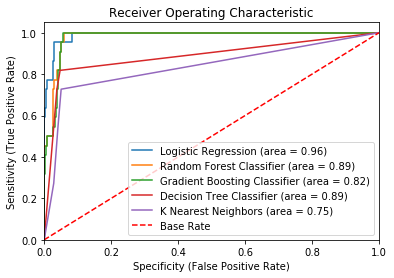

In [32]:
for name, model in models.models:
    model.fit(models.best_x_train, models.best_y_train) # train the model

    # Compute False postive rate, and True positive rate
    if 'scaled' in models.best_dataset:
        fpr, tpr, thresholds = roc_curve(data.test_target_df, model.predict_proba(test_features_df_scaled)[:,1])
    else:
        fpr, tpr, thresholds = roc_curve(data.test_target_df, model.predict_proba(data.test_features_df)[:,1])

    # Calculate Area under the curve to display on the plot
    auc = roc_auc_score(data.test_target_df, model.predict(data.test_features_df))

    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s (area = %0.2f)' % (name, auc))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--', label='Base Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display	    

In [33]:
df_test_pred = models.merge_test_pred(models.predictions)
models.save_results(df_test_pred, 'pit')

## False Positives:

In [34]:
df_false_pos = pd.DataFrame(df_test_pred[(df_test_pred['inducted'] == 0) & (df_test_pred['pred'] == 1)], columns = ['Name', 'inducted', 'pred'])
df_false_pos

,Name,inducted,pred
9,Bob Welch,0.0,1.0
37,Chuck Finley,0.0,1.0
157,Billy Pierce,0.0,1.0
174,Bucky Walters,0.0,1.0
214,Milt Pappas,0.0,1.0
403,Eddie Cicotte,0.0,1.0
569,Tommy John,0.0,1.0
596,David Cone,0.0,1.0
839,Luis Tiant,0.0,1.0
914,Vida Blue,0.0,1.0


## False Negatives:

In [35]:
df_false_neg = pd.DataFrame(df_test_pred[(df_test_pred['inducted'] == 1) & (df_test_pred['pred'] == 0)], columns = ['Name', 'inducted', 'pred'])
df_false_neg

,Name,inducted,pred
239,Clark Griffith,1.0,0.0
325,Catfish Hunter,1.0,0.0
510,Nolan Ryan,1.0,0.0
547,Hoyt Wilhelm,1.0,0.0
566,Early Wynn,1.0,0.0
643,Trevor Hoffman,1.0,0.0
745,Pedro Martinez,1.0,0.0
874,Lee Smith,1.0,0.0
912,Ted Lyons,1.0,0.0


In [36]:
# Turn train/test split off and run all records for players too recent to be eligible for voting
split_train_test = False
rec_data = Data(rec_pitchers_file, drop_cols, label_cols, target_col, preprocess, excl_ped, one_hot_encode, split_train_test, test_pct, seed)


Preprocess:  True
Exclude PED users:  True
Splitting labels, features and target
One-hot Encode:  False
Split Train/Test sets:  False


In [37]:
# Turn scoring off
score = False
models.best_model_predict(rec_data.test_features_df, score)

In [38]:
# Merge recent position player features with predictions and save to Excel.
df = pd.read_csv('data_career\pitchers_recent.csv')
df_final = df[['playerID', 'final']].copy()
df_rec_pred = rec_data.labels_df.join(rec_data.test_features_df)
df_rec_pred = pd.merge(df_rec_pred, df_final, how='left', on='playerID')
df_rec_pred['pred'] = models.predictions
models.save_results(df_rec_pred, 'rec_pit')

In [39]:
df_rec_pit_ind = pd.DataFrame(df_rec_pred[(df_rec_pred['pred'] == 1)], columns = ['Name', 'final', 'pred'])
df_rec_pit_ind

,Name,final,pred
6,CC Sabathia,2019,1.0
12,Tim Hudson,2015,1.0
19,Justin Verlander,2020,1.0
22,Francisco Rodriguez,2017,1.0
23,Mark Buehrle,2015,1.0
150,Zack Greinke,2020,1.0
194,Joe Nathan,2016,1.0


## Predict induction for pitchers who are known PED users
For many of these players, there has been significant public discussion among voting BBWAA members about the impact of their PED usage on their HOF candidacy. As this public perception is outside the scope of the data, let's attempt to predict who would be inducted if PED usage were not an issue.

In [40]:
# Turn train/test split off to disable train/test split
split_train_test = False
excl_ped = False
ped_data = Data(pitchers_ped_file, drop_cols, label_cols, target_col, preprocess, excl_ped, one_hot_encode, split_train_test, test_pct, seed)

Preprocess:  True
Exclude PED users:  False
Splitting labels, features and target
One-hot Encode:  False
Split Train/Test sets:  False


In [41]:
# Turn off scoring because we the value of the target is unknown for these players
score = False
models.best_model_predict(ped_data.test_features_df, score)

In [42]:
# Merge recent position player features with predictions and save to Excel.
df = pd.read_csv('data_career\pitchers_ped.csv')
df_final = df[['playerID', 'final']].copy()
df_ped_pred = ped_data.labels_df.join(ped_data.test_features_df)
df_ped_pred = pd.merge(df_ped_pred, df_final, how='left', on='playerID')
df_ped_pred['pred'] = models.predictions
models.save_results(df_ped_pred, 'pos_play_ped')

### Known PED using pitchers predicted to be inducted into HOF

In [43]:
df_ped_pred_ind = pd.DataFrame(df_ped_pred[(df_ped_pred['pred'] == 1)], columns = ['Name', 'final', 'pred'])
df_ped_pred_ind

,Name,final,pred
7,Kevin Brown,2005,1.0
15,Roger Clemens,2007,1.0
19,Andy Pettitte,2013,1.0


<a class="anchor" id="eight"></a>
## 8. Conclusions
Overall, I am happy with the model's performance. After randomized the train and test sets, predictions are usually in the 95-96% range, which is a solid improvement over the 91-93% base rate of non-induction. 

It's worth remembering that players misclassified as being inducted may still be on the ballot. Any player who appeared in 2007 or later may still be inducted in future voting. 

Of the misclassified players, those included in the known borderline cases in the introduction are often included. This is expected and a sign that the model is missing players that are known to be questionable. 

The following improvements may increase model performance:

- Ensemble modeling may improve performance if the best model misclassifies some players that are better handled by a different model with lower overall performance
- Principal Component Analysis (PCA) might be helpful in handling correlation between features. For example, when a player hits a home run, his statistics increase by one home run, one run scored and at least on run batted in. Employing PCA may clean this up and improve results.
- Model by primary position? - Review of several decision trees shows that misclassified players are frequently similar to players that play a very different defensive position. The balance between offensive and defensive contribution varies significantly by position. So a first baseman and a shortstop with similar offensive statistics have very different values. Breaking the dataset on primary position might improve performance, but modeling may suffer from the smaller sample sizes or increased influence from multi-position players.
